In [9]:
library(rugarch)
library(xts)
library(ggplot2)
library(plotly)

Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




In [7]:
# install.packages("rmgarch")

In [10]:
# Inflation
data <- read.csv("output\\inflationLags.csv",header=TRUE, sep=";", row.names='date')
TSdata <- as.xts(data, order.by=as.Date(rownames(data)))#,"%m/%d/%Y"))
inf <- TSdata[,3]["1993/2021"]

In [11]:
# External Controls
cont <- read.csv("output\\controls_base.csv",header=TRUE, sep=',', row.names='date')
TScont <- as.xts(cont, order.by=as.Date(rownames(cont),"%m/%d/%Y"))#,"%m/%d/%Y""))

General steps -------------
Three steps:
 1. ugarchspec() specify the GARCH model to use (mu, variance and distriburion of e)
 2. ugarchfit() Estimate the GARCH model specified in 1 on the time series.
 3. ugarchforecast(): use the GARCH model to make volatility predictions for t+1

GARCH(1,1), Constant Mean

In [12]:
# Constant mean standard GARCH(1,1) model -----
garchspec <- ugarchspec(mean.model=list(armaOrder = c(0,0)),
                        variance.model = list(model='sGARCH'),
                        distribution.model = 'norm')

garchfit <- ugarchfit(data = inf, spec = garchspec)

garchforercast <- ugarchforecast(fitORspec = garchfit, n.ahead = 5)

# Methods 
# Coefficients
garchcoef <- coef(garchfit)

# Unconditional Variance
garchuncvar <- uncvariance(garchfit)

# Predicted Mean
garchmean <- fitted(garchfit)

# Predicted volatility
garchvol <- sigma(garchfit)

# for predictions
# volatility prediction
volpred <- sigma(garchforercast)
# mean pred
meanpred <- fitted(garchforercast)

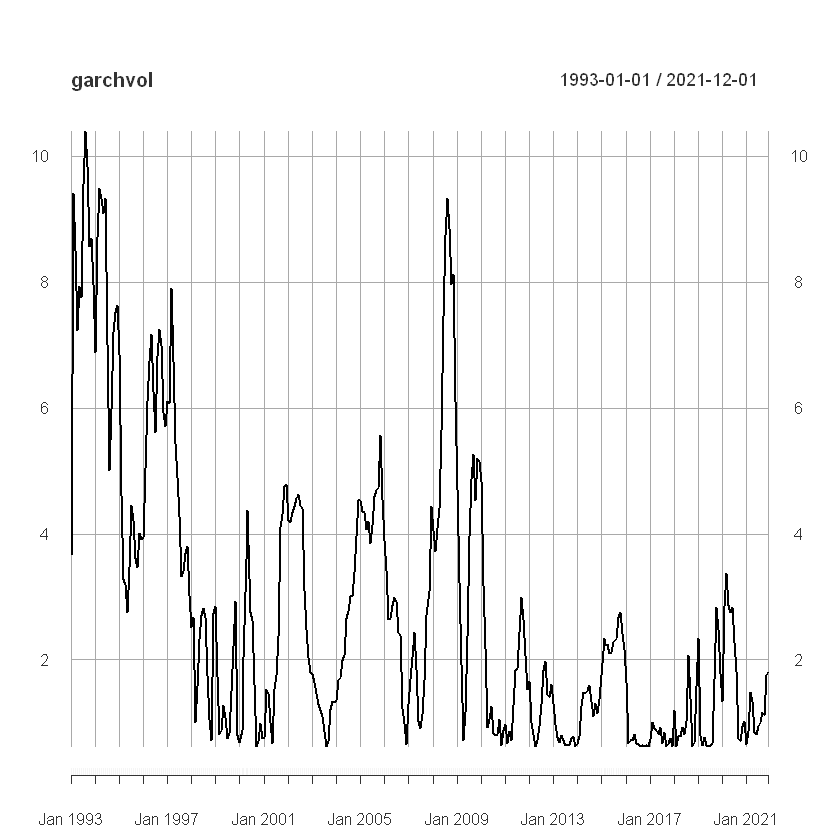

In [14]:
plot(garchvol)

In [17]:
# With ARMA(1,1) mean model

garchspec2 <- ugarchspec(mean.model=list(armaOrder = c(1,1)),
                        variance.model = list(model='sGARCH'),
                        distribution.model = 'std')

garchfit2 <- ugarchfit(data = inf, spec = garchspec2)

garchforercast2 <- ugarchforecast(fitORspec = garchfit, n.ahead = 5)


In [18]:
# Methods 
# Coefficients
garchcoef2 <- coef(garchfit2)

# Unconditional Variance
garchuncvar2 <- uncvariance(garchfit2)

# Predicted Mean
garchmean2 <- fitted(garchfit2)

# Predicted volatility
garchvol2 <- sigma(garchfit2)


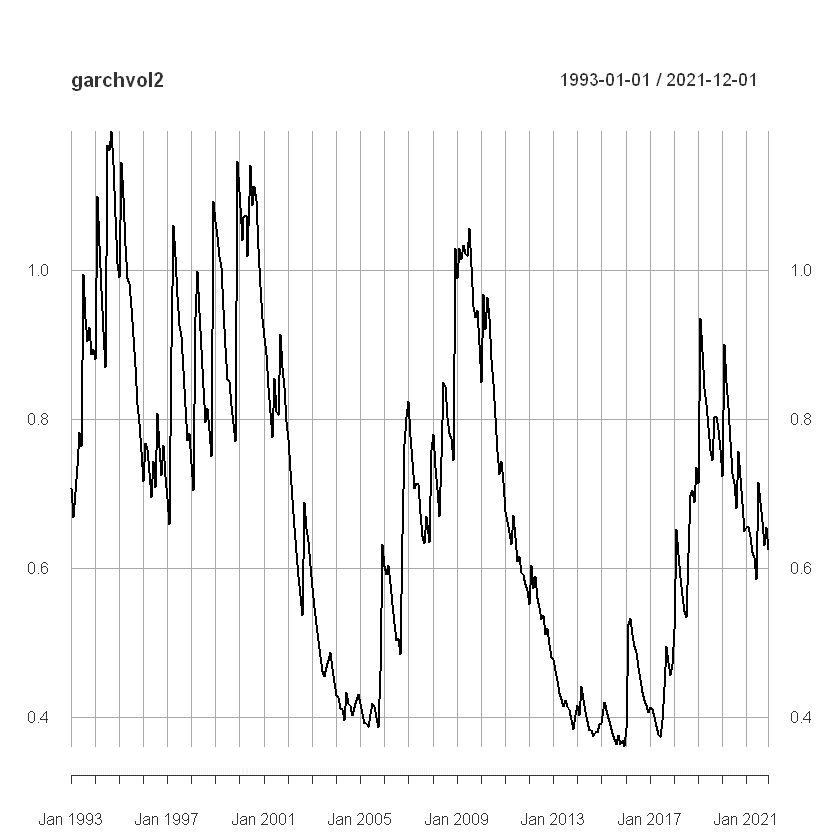

In [20]:
plot(garchvol2)

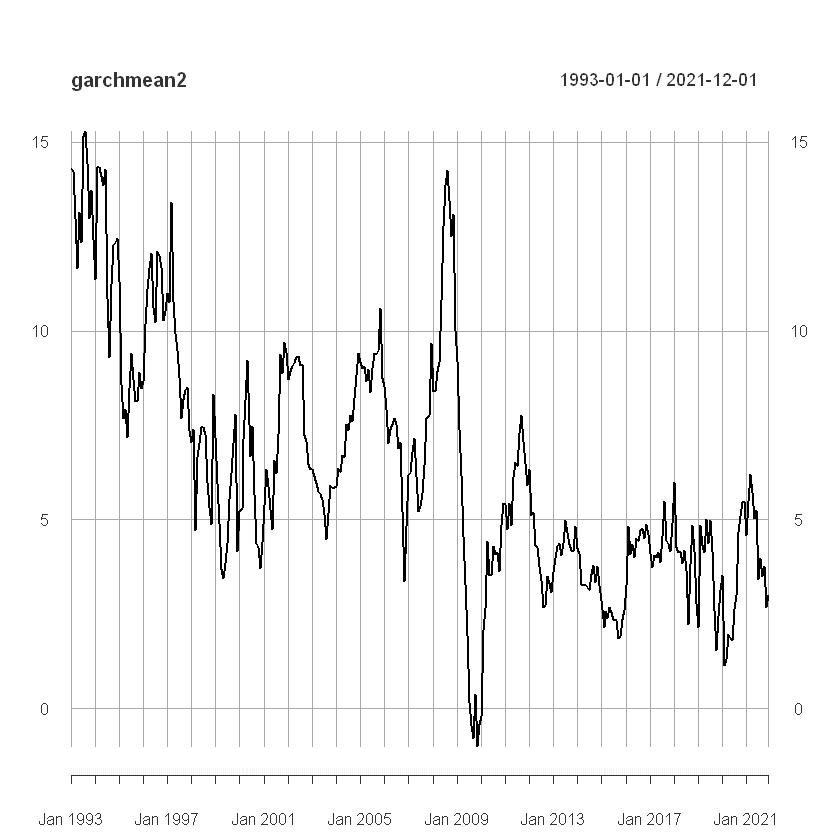

In [21]:
plot(garchmean2)